### 02_analysis_python.ipynb – Business Insights and Visualization (WSDA_Music)

# 🧠 Objective

In this notebook, we move from structural exploration to business-driven analysis.
We will use SQL queries via Python and transform the data with Pandas to answer key business questions:

1. What are the total revenues by music genre?
2. Who are the top 10 customers by total spending?
3. Which artists have the most tracks in the store?
4. Are some countries generating more revenue than others?
5. How is monthly revenue trending over time?

Visualizations will be created using Matplotlib.

# ✅ Setup

In [17]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

In [18]:
# Connect to the database
db_path = Path("../data/WSDA_Music.db")
conn = sqlite3.connect(db_path)


# 📊 1. Revenue by Genre

In [19]:
query_genre_revenue = """
SELECT g.name AS genre, ROUND(SUM(il.unitprice * il.quantity), 2) AS total_revenue
FROM invoiceline il
JOIN track t ON il.trackid = t.trackid
JOIN genre g ON t.genreid = g.genreid
GROUP BY g.name
ORDER BY total_revenue DESC;
"""


genre_revenue = pd.read_sql(query_genre_revenue, conn)

In [20]:
# In order to save charts to /images
dst = Path("../images")
dst.mkdir(exist_ok=True)

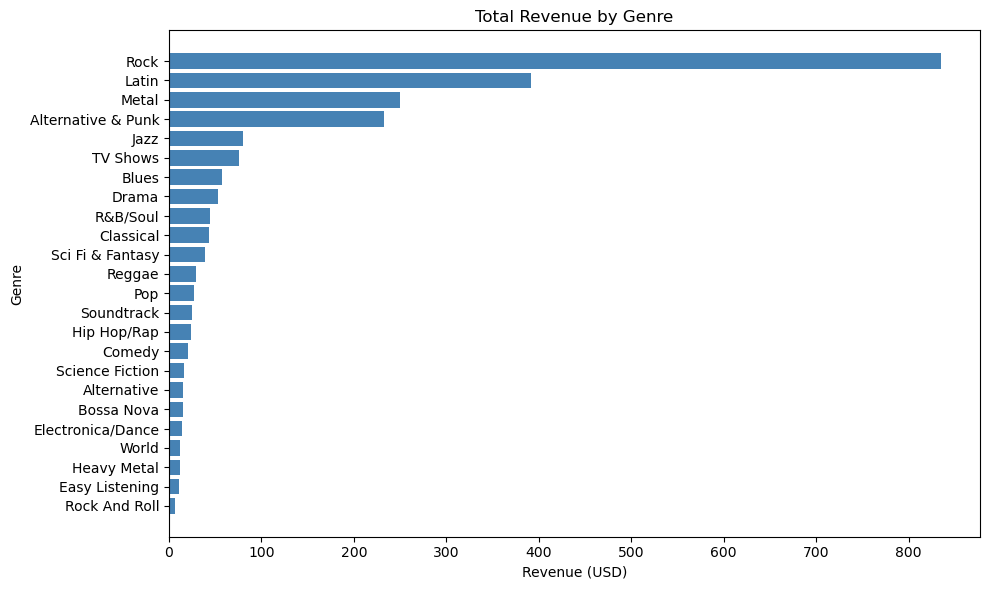

In [21]:
plt.figure(figsize=(10,6))
plt.barh(genre_revenue['genre'], genre_revenue['total_revenue'], color='steelblue')
plt.title("Total Revenue by Genre")
plt.xlabel("Revenue (USD)")
plt.ylabel("Genre")
plt.gca().invert_yaxis()  # To display highest revenue on top
plt.tight_layout()
plt.savefig(dst / "total_revenue_by_genre.png")
plt.show()


# 👣 Next Steps are:
- A similar structure will be repeated for:
  - Top 10 customers by spending
  - Revenue by country
  - Monthly revenue trends

- All charts will be saved in /images for easy access.

# ✅ 2. Top 10 Customers by Spending

In [22]:
query_top_customers = """
SELECT c.firstname || ' ' || c.lastname AS customer_name,
       ROUND(SUM(il.unitprice * il.quantity), 2) AS total_spent
FROM invoiceline il
JOIN invoice i ON il.invoiceid = i.invoiceid
JOIN customer c ON i.customerid = c.customerid
GROUP BY customer_name
ORDER BY total_spent DESC
LIMIT 10;
"""

top_customers = pd.read_sql(query_top_customers, conn)

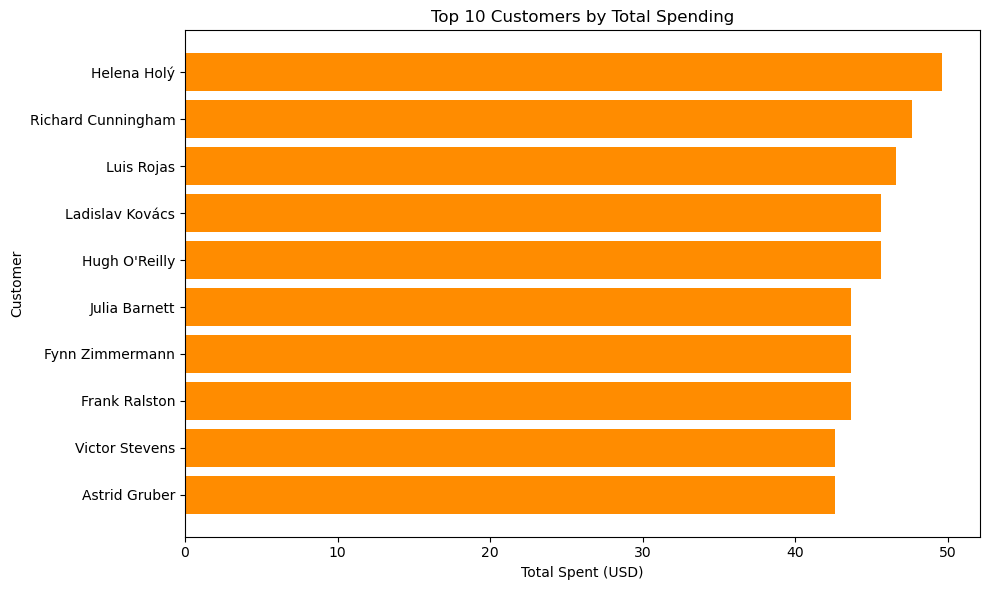

In [23]:
plt.figure(figsize=(10,6))
plt.barh(top_customers['customer_name'], top_customers['total_spent'], color='darkorange')
plt.title("Top 10 Customers by Total Spending")
plt.xlabel("Total Spent (USD)")
plt.ylabel("Customer")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.savefig(dst / "top_customers.png")
plt.show()


# 🌎 3. Revenue by Country

In [24]:
query_revenue_by_country = """
SELECT c.country,
    ROUND(SUM(il.unitprice * il.quantity), 2) AS total_revenue
FROM invoiceline il
JOIN invoice i ON il.invoiceid = i.invoiceid
JOIN customer c ON i.customerid = c.customerid
GROUP BY c.country
ORDER BY total_revenue DESC
"""

df_revenue_country = pd.read_sql(query_revenue_by_country, conn)

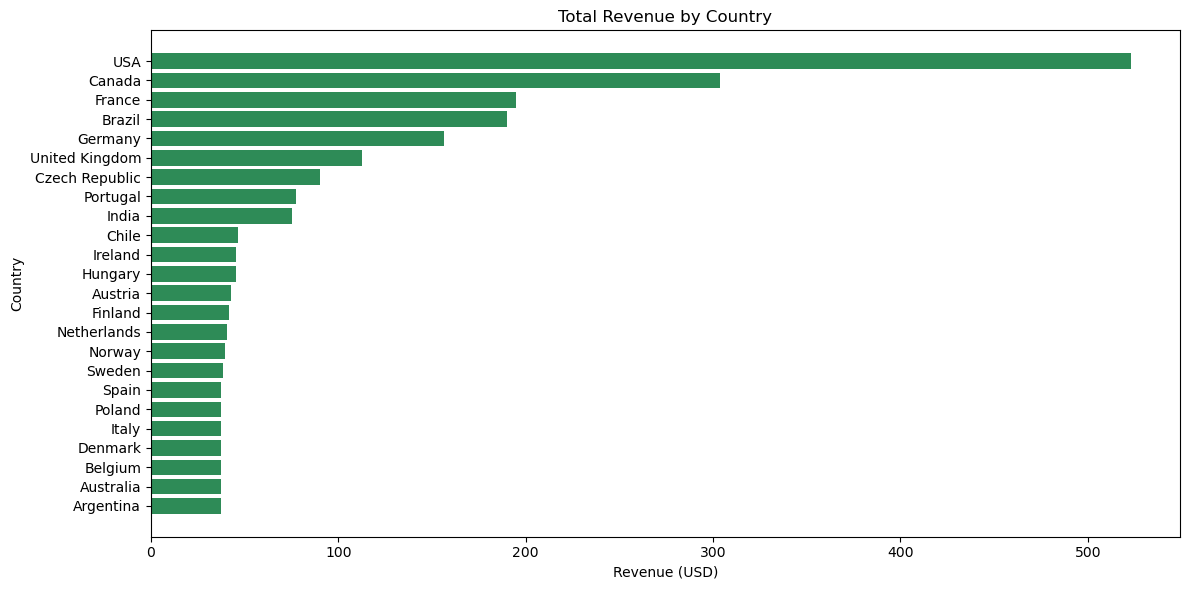

In [25]:
plt.figure(figsize=(12, 6))
plt.barh(df_revenue_country['Country'], df_revenue_country['total_revenue'], color='seagreen')
plt.title("Total Revenue by Country")
plt.xlabel("Revenue (USD)")
plt.ylabel("Country")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.savefig(dst / "revenue_by_country.png")
plt.show()

# 📅 4. Monthly Revenue Trends

In [26]:
query_monthly_revenue = """
SELECT 
    strftime('%Y-%m', i.invoicedate) AS year_month,
    ROUND(SUM(il.unitprice * il.quantity), 2) AS total_revenue
FROM invoiceline il
JOIN invoice i ON il.invoiceid = i.invoiceid
GROUP BY year_month
ORDER BY year_month ASC;
"""
monthly_revenue = pd.read_sql(query_monthly_revenue, conn)

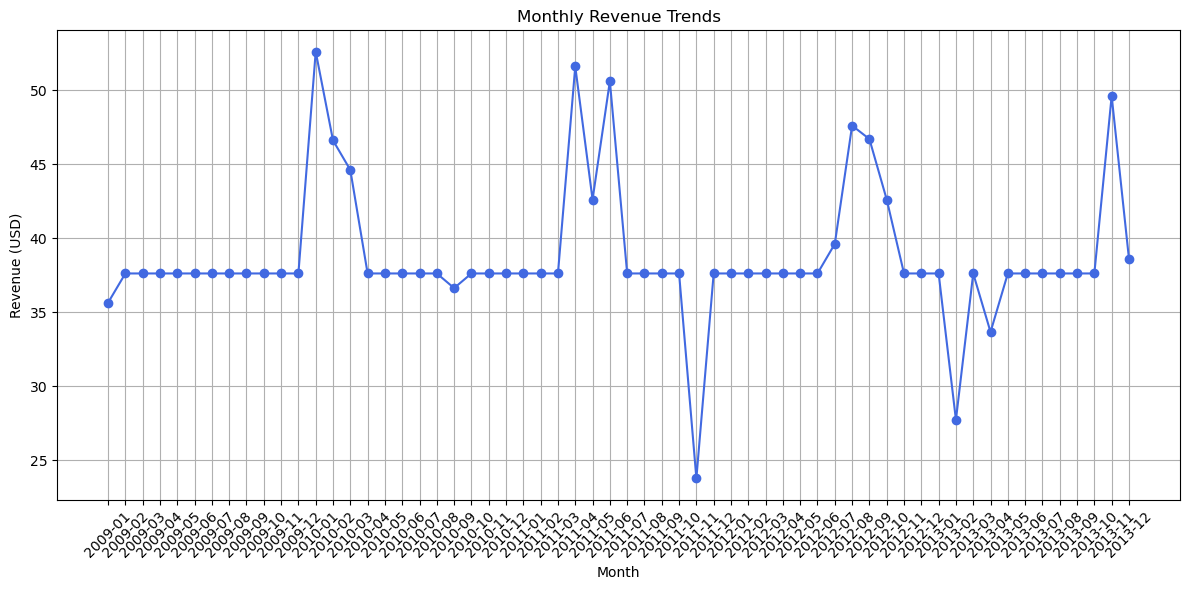

In [27]:
plt.figure(figsize=(12, 6))
plt.plot(monthly_revenue['year_month'], monthly_revenue['total_revenue'], marker='o', color='royalblue')
plt.title("Monthly Revenue Trends")
plt.xlabel("Month")
plt.ylabel("Revenue (USD)")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.savefig("../images/monthly_revenue_trend.png")
plt.show()
